## E94096055 牛俊傑 工程數學(三)期末作業
#### 使用python做出一維以及二維的快速傅立葉變換

In [1]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
import scipy.fft

# 一維快速傅立葉變換FFT(fast fourier transfer)



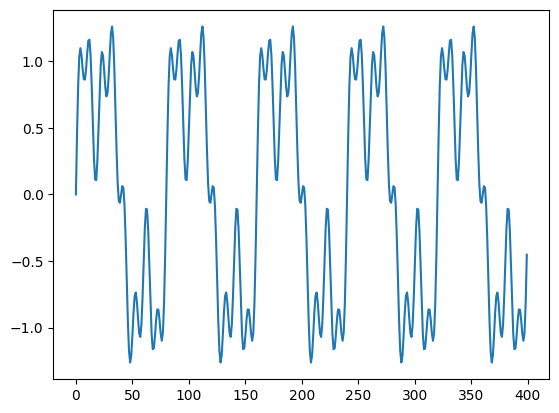

In [2]:
t = 0.5             # 取樣時間
sample_rate = 800  # 取樣率，每秒取幾個樣本
#建立隨便一個訊號
def signal(t, sample_rate):
    f = 10
    x = np.linspace(0, t, int(t * sample_rate), endpoint = False)
    return (np.sin(1 * f * 2 * np.pi * x) / 1 +    #方便觀察把1寫出來
            np.sin(3 * f * 2 * np.pi * x) / 2 + 
            np.sin(4 * f * 2 * np.pi * x) / 5 +
            np.sin(8 * f * 2 * np.pi * x) / 3 )
    
samples = signal(t, sample_rate)#例子一
plt.plot(samples)#顯示例子一

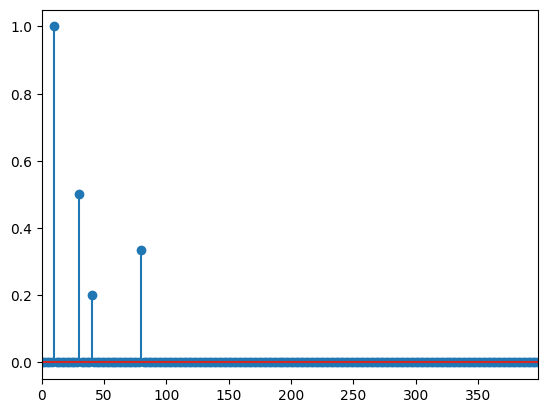

In [3]:
sp = np.fft.fft(samples) #做np的FFT
freq = np.fft.fftfreq(samples.size, d = 1 / sample_rate) #頻率
amp = np.abs(sp) #振幅
#圖
ax = plt.gca()
ax.stem( freq ,amp / np.max(amp))#x:頻率，y:振幅
ax.set_xlim([0,  np.max(freq)])
plt.show()

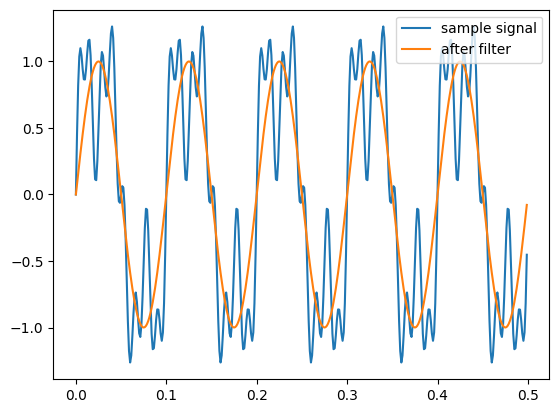

In [4]:
sp2 = sp.copy()
# 濾掉頻率 10 與 -10 以外的部份
sp2[np.intersect1d(np.where(freq != 10), np.where(freq!=-10))]=0
# 只需要實部的部份
samples2 = np.fft.ifft(sp2).real
#取x範圍與dx
x = np.linspace(0, t, int(t * sample_rate), endpoint = False)
plt.plot(x, samples,label = 'sample signal')
plt.plot(x, samples2,label = 'after filter')
plt.legend()#顯示圖例
plt.show()

C:\Users\chunc\AppData\Roaming\Python\Python310\site-packages\matplotlib\cbook\__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


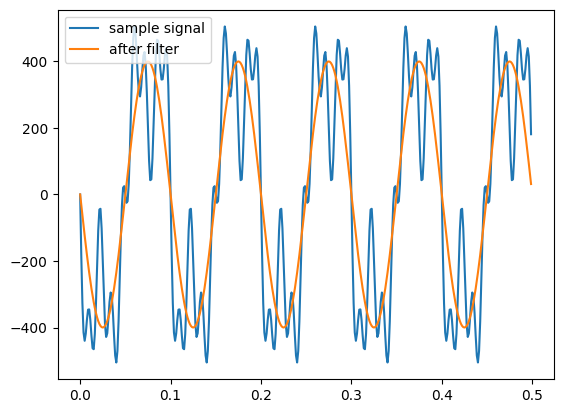

In [5]:
y_sci = scipy.fft.fft(sp) #sample signal做scipy的FFT
y_sci2 = scipy.fft.fft(sp2) #after filter做scipy的FFT
#取x範圍與dx
x = np.linspace(0, t, int(t * sample_rate), endpoint = False)
plt.plot(x, y_sci,label = 'sample signal')
plt.plot(x, y_sci2,label = 'after filter')
plt.legend()
plt.show()


### 我是真的不知道為啥np跟scipy會相反，我看網路上的範例是正常的


# 二維FFT

## 未完成

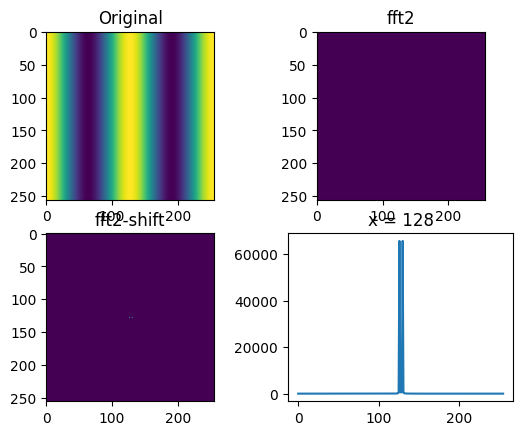

In [6]:
N = 256
x = np.linspace(-10, 10, N)
y = np.linspace(-10, 10, N)

X,Y = np.meshgrid(x,y)

Z = 2 * np.cos(0.2 * np.pi * X)     #光柵

Z_fft2 = np.fft.fft2(Z)
Z_fft2_sh = abs(np.fft.fftshift(Z_fft2))

plt.subplot(221)
plt.imshow(Z)
plt.title('Original')

plt.subplot(222)
plt.imshow(abs(Z_fft2))
plt.title('fft2')

plt.subplot(223)
plt.imshow(Z_fft2_sh)
plt.title('fft2-shift')

plt.subplot(224)
plt.plot(Z_fft2_sh[128,:])
plt.title('x = 128')


plt.show()

---
## 圖片轉換成頻域後再轉換回原本的

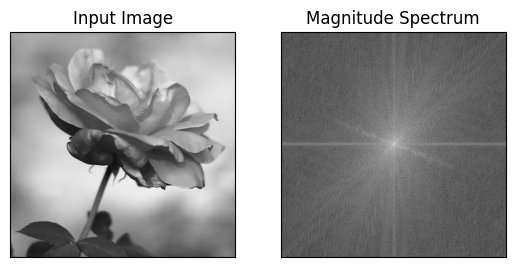

In [7]:
img = cv.imread('rose.jpg', 0)
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20 * np.log(np.abs(fshift))

plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

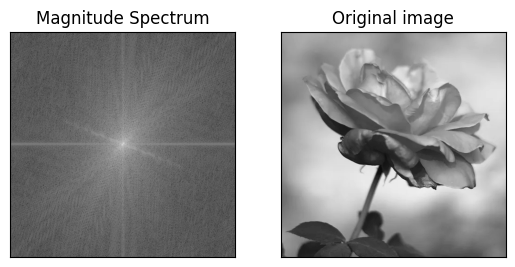

In [8]:
ifshift = np.fft.ifftshift(fshift)
ifimg = np.log(np.abs(ifshift))
ff = np.fft.ifft2(ifshift)
ori_img = np.abs(ff)

plt.subplot(122),plt.imshow(ori_img, cmap = 'gray')
plt.title('Original image'), plt.xticks([]), plt.yticks([])
plt.subplot(121),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

### 未來展望
#### 可以試著將圖片濾掉某些頻段來看看換回原本的圖有什麼不一樣